In [1]:
# Sample Machine Learning Project
# Dataset: wine_new.csv

In [2]:
# Steps:
# 1. Data Import
# 2. Data Cleaning - Missing Values
# 3. Exploratory Data Analysis
# 4. Outlier Detection and Removal
# 5. Data Balancing / Resampling
# 6. Feature Selection / Dimentionality Reduction
# 7. Feature Scaling
# 8. Cross Validation
# 9. Algorithm, Hyperparameter Tuning
# 10. Model Building
# 11. Predictions, Performance Monitoring
# 12. Deployment

In [3]:
# Import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 1. Data Import
df = pd.read_csv('wine-new.csv')

In [5]:
df.shape

(178, 14)

In [6]:
# 2. Data Cleaning - Missing Values
df.isnull().sum()

class                            0
alcohol                          0
 malic_acid                      0
 ash                             0
 alcalinity_of_ash               0
 magnesium                       3
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 0
 color_intensity                 0
 hue                             2
 od280/od315_of_diluted_wines    7
 proline                         0
dtype: int64

In [7]:
df.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [8]:
df.columns

Index(['class', 'alcohol', ' malic_acid', ' ash', ' alcalinity_of_ash',
       ' magnesium', ' total_phenols', ' flavanoids', ' nonflavanoid_phenols',
       ' proanthocyanins', ' color_intensity', ' hue',
       ' od280/od315_of_diluted_wines', ' proline'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [11]:
df.fillna(method='pad', inplace=True)

In [12]:
df.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [13]:
# Seperate input and output data
x = df.drop('class', axis = 1)

y = df['class']

In [14]:
x.shape

(178, 13)

In [15]:
# 3. Exploratory Data Analysis
x.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [16]:
x.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

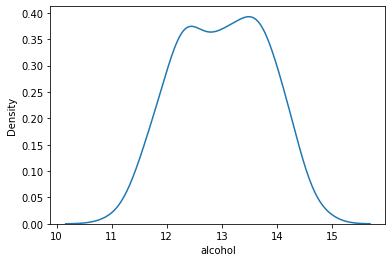

In [21]:
sns.kdeplot(df['alcohol'])

<AxesSubplot:xlabel='alcalinity_of_ash', ylabel='Density'>

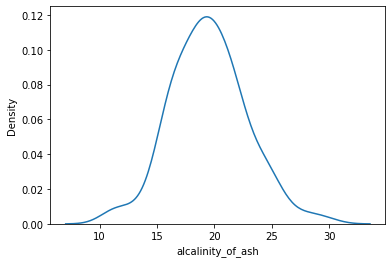

In [22]:
sns.kdeplot(df['alcalinity_of_ash'])

<AxesSubplot:xlabel='ash', ylabel='Density'>

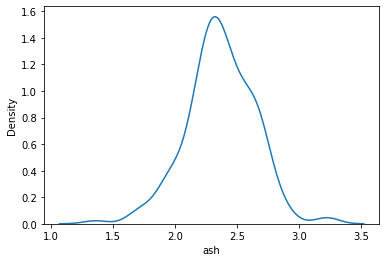

In [23]:
sns.kdeplot(df['ash'])

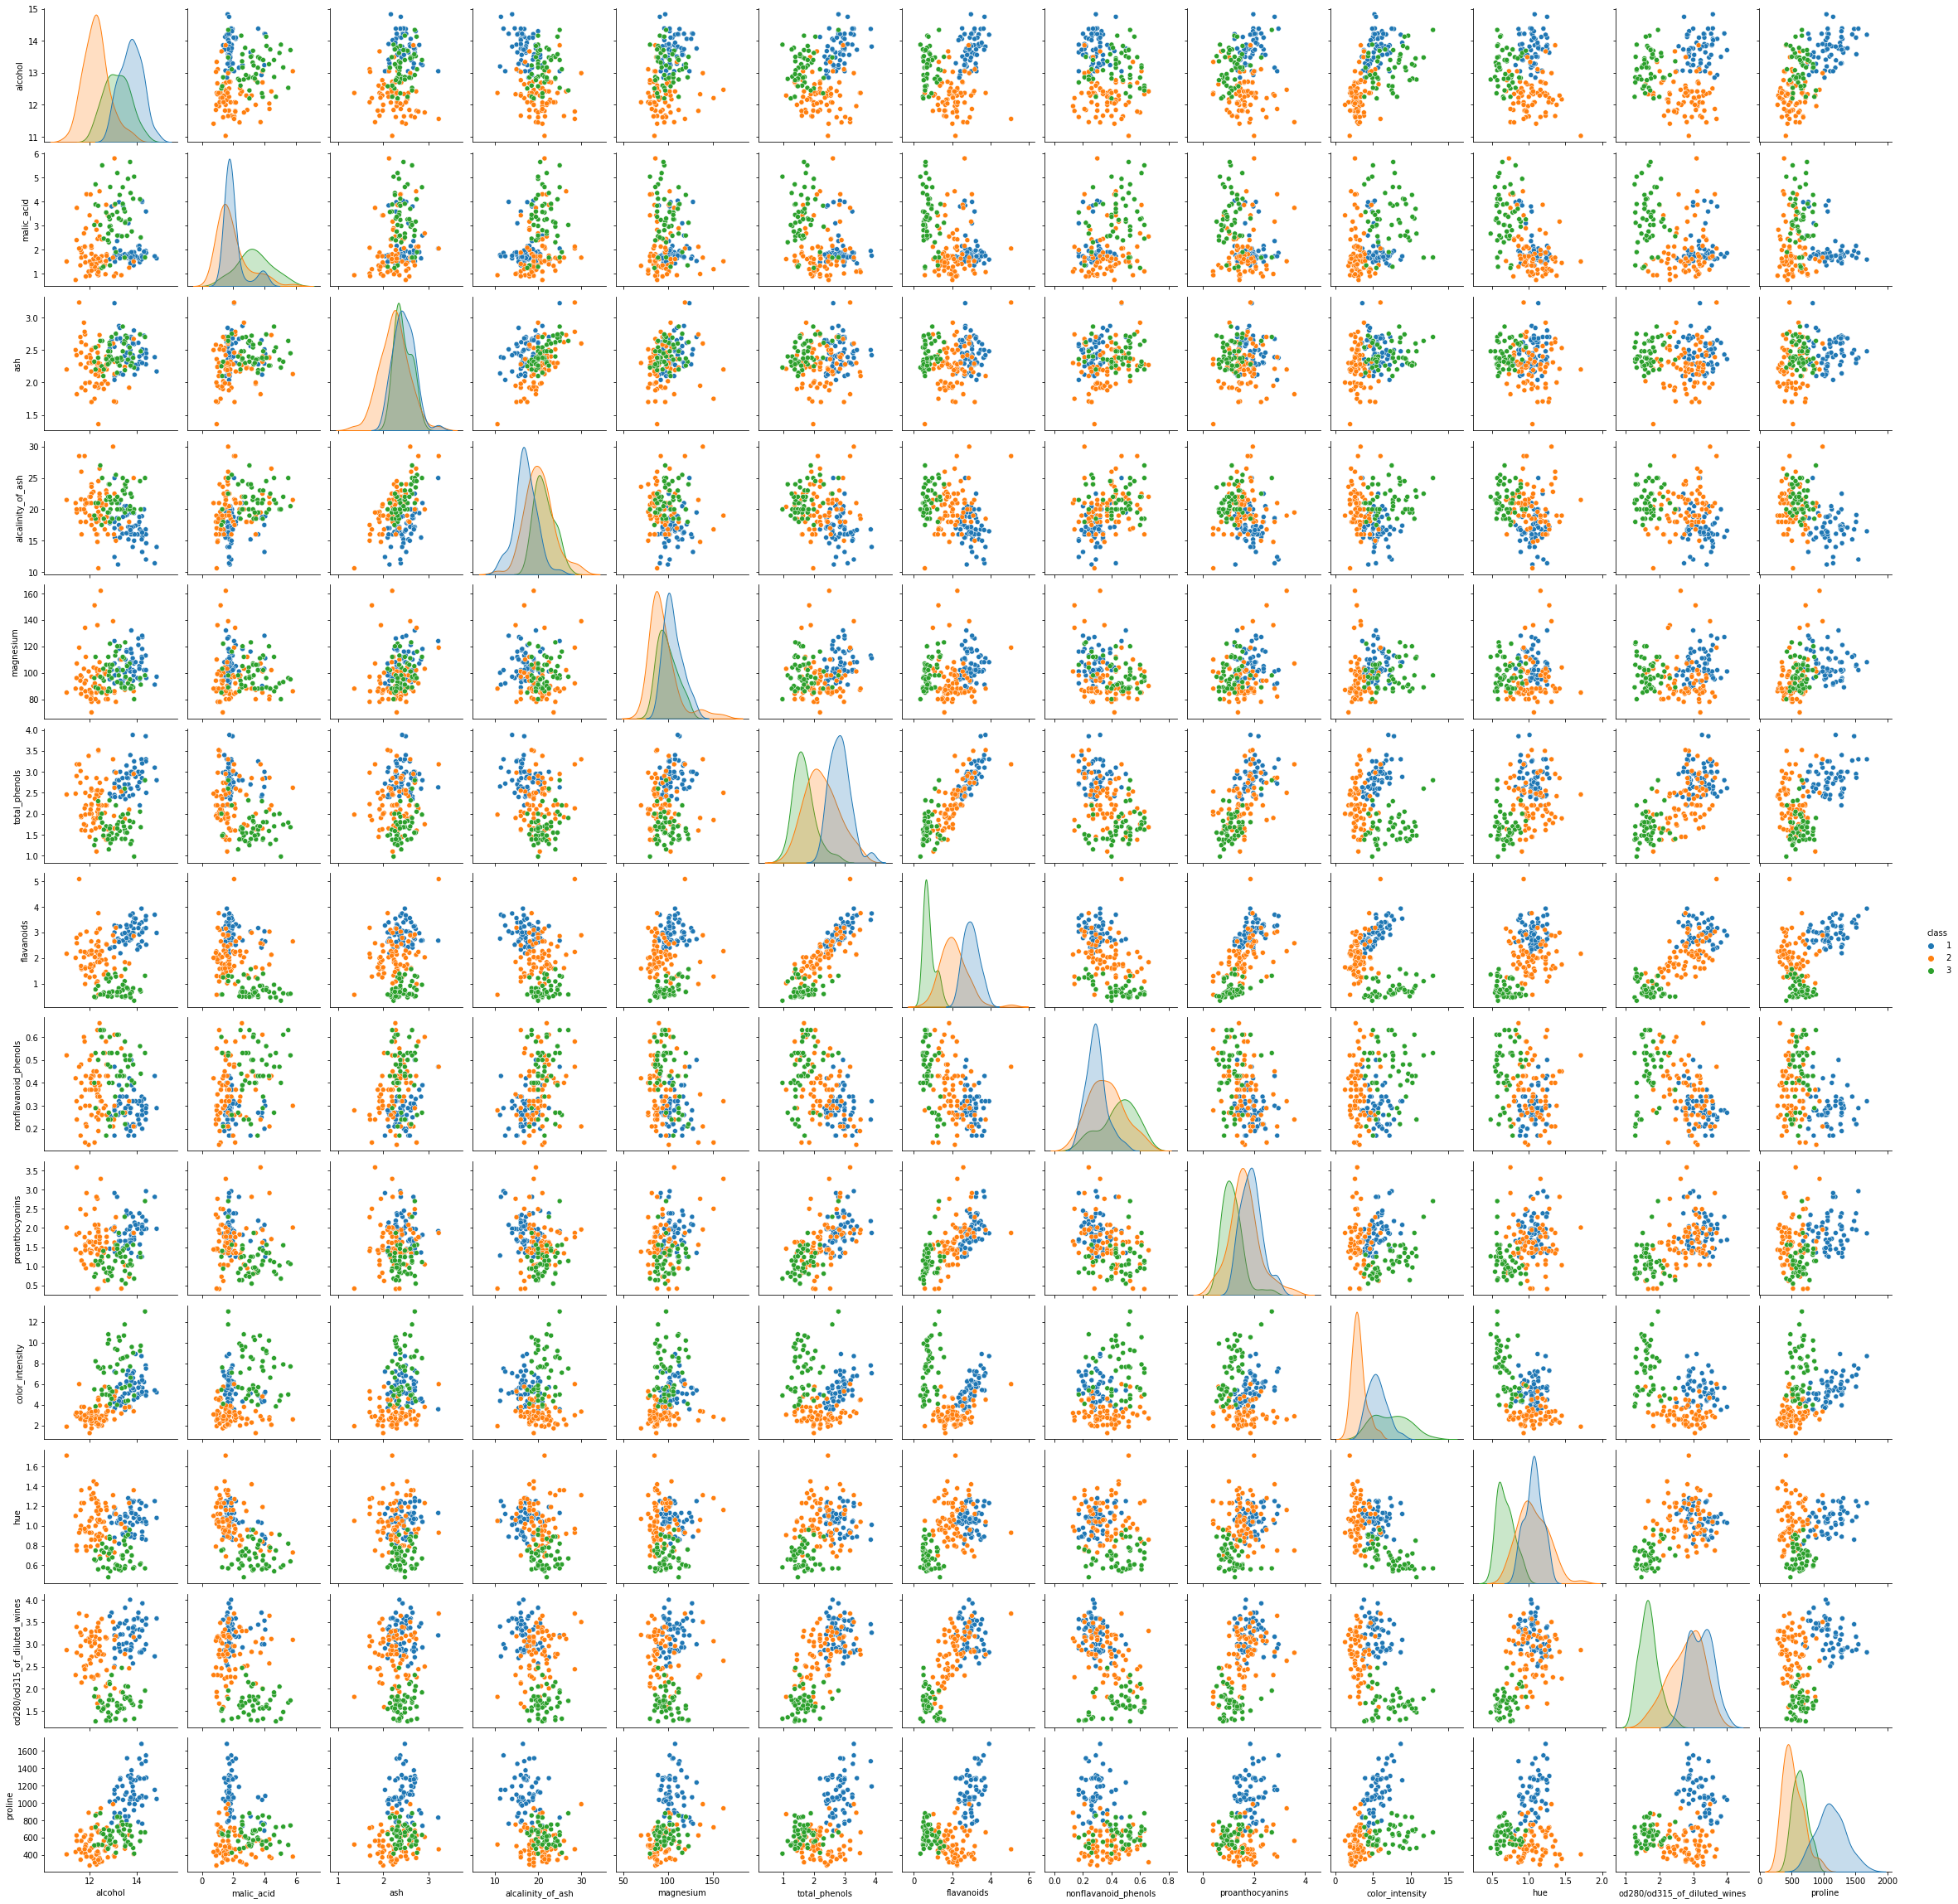

In [24]:
sns.pairplot(df, hue='class',palette='tab10')

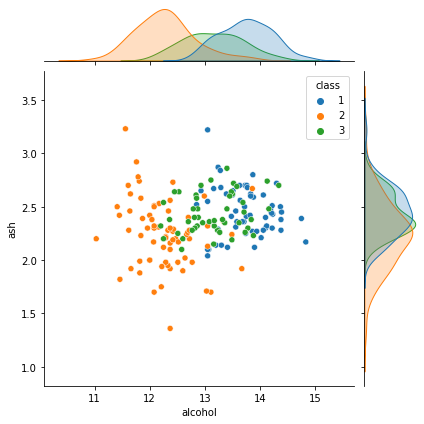

In [25]:
sns.jointplot(data=df, x = 'alcohol', y= 'ash', 
              hue='class', palette='tab10')

<AxesSubplot:xlabel='class', ylabel='count'>

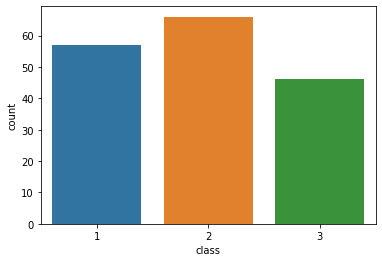

In [26]:
sns.countplot(x = y)

In [27]:
y.value_counts()

2    66
1    57
3    46
Name: class, dtype: int64

In [28]:
# 4. Outlier Detection and Removal
from sklearn.ensemble import IsolationForest
iso = IsolationForest(random_state=0, contamination=0.05)
clean = iso.fit_predict(x, y)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
x = x[clean == 1]
y = y[clean == 1]

In [30]:
x.shape

(160, 13)

In [31]:
# 5. Data Balancing / Resampling
y.value_counts()

2    61
1    54
3    45
Name: class, dtype: int64

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x, y)

In [34]:
x_res.shape

(183, 13)

In [35]:
y_res.value_counts()

3    61
2    61
1    61
Name: class, dtype: int64

In [36]:
# 6. Feature Scaling

In [37]:
x_res.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

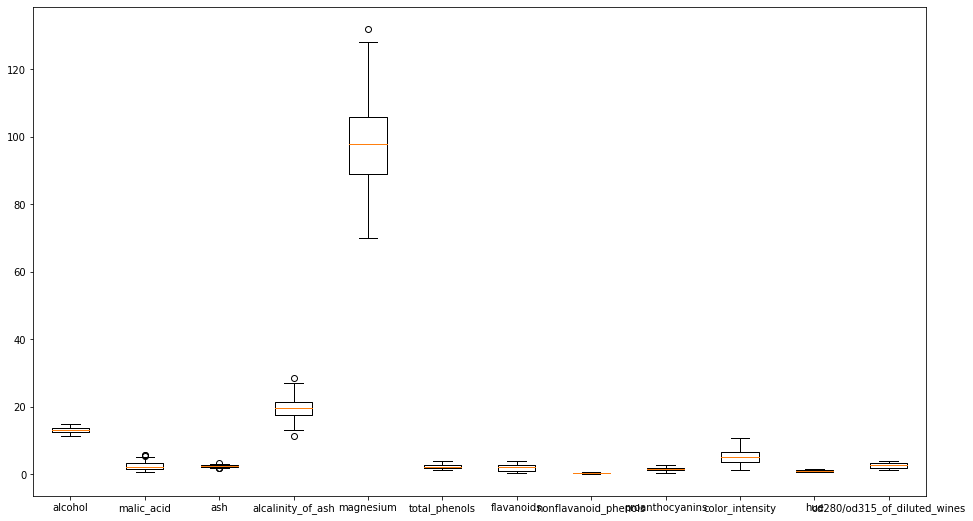

In [38]:
x_new = x_res.drop('proline', axis = 1)
plt.figure(figsize=(16,9))
plt.boxplot(x_new, labels=x_new.columns);

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_res)

In [40]:
x_scaled = pd.DataFrame(x_scaled, columns=x_res.columns)

In [41]:
x_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.824561,0.191700,0.480263,0.254335,0.919355,0.611511,0.789634,0.283019,0.783333,0.457983,0.577320,0.970696,0.636217
1,0.523392,0.205534,0.289474,0.000000,0.483871,0.557554,0.698171,0.245283,0.362500,0.325630,0.587629,0.780220,0.624091
2,0.511696,0.320158,0.638158,0.427746,0.500000,0.611511,0.844512,0.320755,1.000000,0.462185,0.567010,0.695971,0.733226
3,0.535088,0.365613,0.769737,0.566474,0.774194,0.611511,0.676829,0.490566,0.587500,0.319328,0.577320,0.608059,0.369442
4,0.815789,0.201581,0.493421,0.231214,0.677419,0.780576,0.890244,0.396226,0.650000,0.574580,0.587629,0.578755,0.947454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.804094,0.349802,0.513158,0.508671,0.338710,0.208633,0.070122,0.584906,0.345833,0.884454,0.144330,0.161172,0.308812
179,0.342105,0.108696,0.263158,0.508671,0.532258,0.136691,0.033537,0.754717,0.412500,0.663866,0.103093,0.102564,0.292643
180,0.514620,0.879447,0.407895,0.624277,0.370968,0.230216,0.048780,0.905660,0.475000,0.695378,0.123711,0.076923,0.361358
181,0.558480,0.494071,0.447368,0.595376,0.354839,0.298561,0.088415,0.603774,0.350000,0.750000,0.072165,0.128205,0.300728


In [42]:
x_scaled.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
# 7. Feature Selection / Dimentionality Reduction

In [43]:
from sklearn.feature_selection import SelectKBest, chi2

In [44]:
skf = SelectKBest(score_func=chi2, k=5)

In [45]:
x_new = skf.fit_transform(x_scaled, y_res)

In [46]:
x_new.shape

(183, 5)

In [47]:
skf.get_support()

array([False, False, False, False, False,  True,  True, False, False,
        True, False,  True,  True])

In [48]:
x_new = x_scaled.iloc[:,skf.get_support()]

In [49]:
x_new

,total_phenols,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
0,0.611511,0.789634,0.457983,0.970696,0.636217
1,0.557554,0.698171,0.325630,0.780220,0.624091
2,0.611511,0.844512,0.462185,0.695971,0.733226
3,0.611511,0.676829,0.319328,0.608059,0.369442
4,0.780576,0.890244,0.574580,0.578755,0.947454
...,...,...,...,...,...
178,0.208633,0.070122,0.884454,0.161172,0.308812
179,0.136691,0.033537,0.663866,0.102564,0.292643
180,0.230216,0.048780,0.695378,0.076923,0.361358
181,0.298561,0.088415,0.750000,0.128205,0.300728


In [50]:
y_res.shape

(183,)

In [51]:
x_new.shape

(183, 5)

In [52]:
# 8. Cross Validation
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y_res, random_state=0, stratify=y_res)

In [54]:
x_train.shape

(137, 5)

In [55]:
x_test.shape

(46, 5)

In [56]:
y_train.value_counts()

3    46
2    46
1    45
Name: class, dtype: int64

In [57]:
# 9. Algorithm, Hyperparameter Tuning

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {
    'random_state': [0,1,2,3,4,5],
    'n_estimators': [10, 20, 30, 40, 50, 100],
    'criterion': ['gini','entropy']
}

In [61]:
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid=params, cv=5, 
                    scoring='accuracy')

In [62]:
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9782608695652174

In [64]:
grid.best_estimator_

RandomForestClassifier(n_estimators=40, random_state=0)

In [65]:
from sklearn.feature_selection import RFE

In [66]:
rfe = RFE(rf, n_features_to_select=5)

In [82]:
%%time
rfe.fit(x_scaled, y_res)

CPU times: user 1.92 s, sys: 3.97 ms, total: 1.92 s
Wall time: 1.92 s


RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [68]:
rfe.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [69]:
x_new = x_scaled.iloc[:,rfe.get_support()]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y_res, random_state=0, stratify=y_res)

In [80]:
%%time
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

CPU times: user 231 ms, sys: 34 µs, total: 231 ms
Wall time: 236 ms


In [72]:
accuracy_score(y_test, y_pred)

0.9782608695652174

In [73]:
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid=params, cv=5, 
                    scoring='accuracy')

In [74]:
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
accuracy_score(y_test, y_pred)

0.9782608695652174

In [75]:
# Serialization

In [76]:
import joblib

In [77]:
joblib.dump(grid, 'classifier.model')

['classifier.model']

In [78]:
joblib.dump(scaler, 'scaler.model')

['scaler.model']

In [79]:
x_new.columns

Index(['flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')

In [ ]:
!pip install keras tensorflow -U